# Loading the Dataset

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet18
from torch.utils.data import random_split, DataLoader

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset (ResNet requires 3-channel input, so we expand channels)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel to 3-channel
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download MNIST dataset
full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split into train (90%) and validation (10%) sets
train_size = int(0.9 * len(full_trainset))
val_size = len(full_trainset) - train_size
trainset, valset = random_split(full_trainset, [train_size, val_size])

# Data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

# Modify ResNet18 for MNIST
model = resnet18(pretrained=False)  # Load ResNet18 without ImageNet weights
model.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3, bias=False)  # Modify for 3-channel MNIST
model.fc = nn.Linear(512, 10)  # Adjust for 10 output classes (digits 0-9)
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Training the Model
with early stopping to avoid overfitting

In [ ]:
# Early stopping parameters
patience = 5  # Stop if val loss doesn't improve for 5 epochs
best_val_loss = float('inf')
epochs_no_improve = 0

# Training loop with early stopping
epochs = 100  # Maximum epochs
train_losses, val_losses = [], []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(valloader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0  # Reset counter
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered. Training stopped.")
        break

print("Training complete.")

Epoch 1/100, Train Loss: 0.0798, Val Loss: 0.0348
Epoch 2/100, Train Loss: 0.0441, Val Loss: 0.0468
Epoch 3/100, Train Loss: 0.0361, Val Loss: 0.0813
Epoch 4/100, Train Loss: 0.0297, Val Loss: 0.0347
Epoch 5/100, Train Loss: 0.0270, Val Loss: 0.0309
Epoch 6/100, Train Loss: 0.0258, Val Loss: 0.0267
Epoch 7/100, Train Loss: 0.0237, Val Loss: 0.0355
Epoch 8/100, Train Loss: 0.0222, Val Loss: 0.0323
Epoch 9/100, Train Loss: 0.0188, Val Loss: 0.0512
Epoch 10/100, Train Loss: 0.0195, Val Loss: 0.0442
Epoch 11/100, Train Loss: 0.0077, Val Loss: 0.0238
Epoch 12/100, Train Loss: 0.0054, Val Loss: 0.0284
Epoch 13/100, Train Loss: 0.0067, Val Loss: 0.0229
Epoch 14/100, Train Loss: 0.0063, Val Loss: 0.0188
Epoch 15/100, Train Loss: 0.0066, Val Loss: 0.0258
Epoch 16/100, Train Loss: 0.0048, Val Loss: 0.0322
Epoch 17/100, Train Loss: 0.0049, Val Loss: 0.0407
Epoch 18/100, Train Loss: 0.0043, Val Loss: 0.0289
Epoch 19/100, Train Loss: 0.0019, Val Loss: 0.0245
Early stopping triggered. Training stopp

# Check the Model Layers

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Visualize the Learned CNN Filters

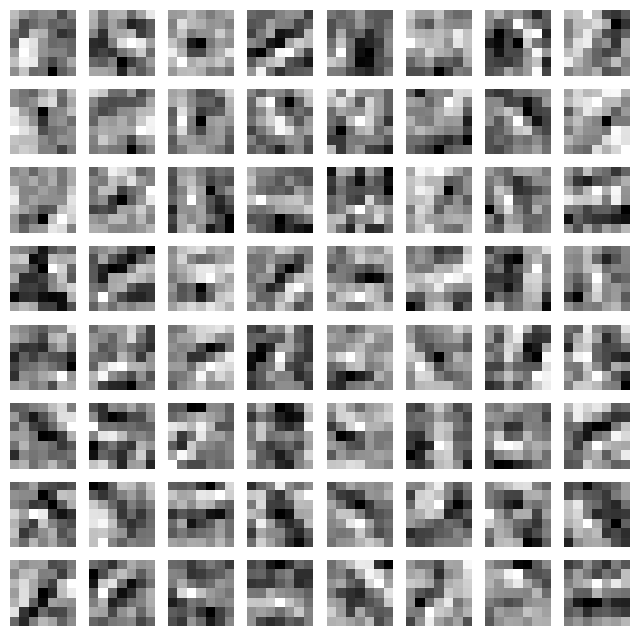

In [ ]:
def visualize_filters_grayscale(model):
    filters = model.conv1.weight.data.cpu().numpy()  # Get filter weights
    filters = (filters - filters.min()) / (filters.max() - filters.min())  # Normalize to [0,1]

    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        if i < filters.shape[0]:
            grayscale_filter = np.mean(filters[i], axis=0)  # Convert 3-channel to 1-channel (grayscale)
            ax.imshow(grayscale_filter, cmap='gray')  # Show in grayscale
            ax.axis("off")

    plt.show()

visualize_filters_grayscale(model)

# Visualize how specific images behave through filters

## Visualizing a sober filter as an image

Shape of Sobel filter 3D tensor: torch.Size([1, 28, 28, 3])


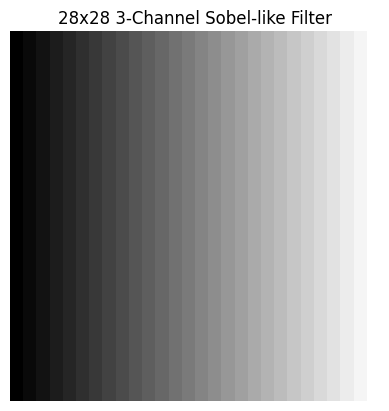

Shape of Sobel filter 3D tensor: torch.Size([1, 3, 28, 28])


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Create a 28x28 Sobel-like filter as shown before
sobel_size = 28
sobel_filter = np.zeros((sobel_size, sobel_size))

# Horizontal Sobel-like filter pattern
for i in range(sobel_size):
    for j in range(sobel_size):
        if j < sobel_size // 2:
            sobel_filter[i, j] = -1 * (sobel_size // 2 - j)
        elif j > sobel_size // 2:
            sobel_filter[i, j] = 1 * (j - sobel_size // 2)

# Normalize the filter to a range of 0 to 1
sobel_filter = (sobel_filter - sobel_filter.min()) / (sobel_filter.max() - sobel_filter.min())

# Expand the Sobel filter to 3 channels by repeating along the third dimension
sobel_filter_3d = np.repeat(sobel_filter[:, :, np.newaxis], 3, axis=2)

# Convert to a PyTorch tensor and add a batch dimension
sobel_tensor_3d = torch.tensor(sobel_filter_3d, dtype=torch.float32).unsqueeze(0)

# Now `sobel_tensor_3d` can be passed into a model as an image input
print(f"Shape of Sobel filter 3D tensor: {sobel_tensor_3d.shape}")

# Visualize the Sobel filter as a 3-channel image
plt.imshow(sobel_filter_3d)
plt.title("28x28 3-Channel Sobel-like Filter")
plt.axis('off')
plt.show()

# From shape (1, 28, 28, 3) to (1, 3, 28, 28)
sobel_tensor_3d = sobel_tensor_3d.permute(0, 3, 1, 2)

# Now `sobel_tensor_3d` can be passed into a model as an image input
print(f"Shape of Sobel filter 3D tensor: {sobel_tensor_3d.shape}")

## Loading one image from dataloader

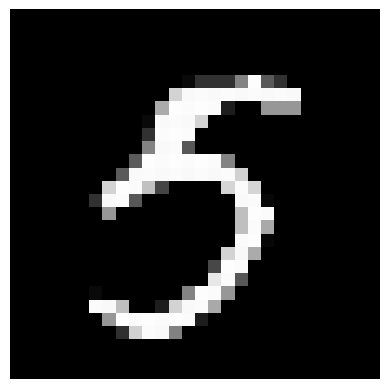

In [ ]:
def visualize_image(image):
    # If image is on the GPU, move it to CPU for visualization
    image = image.cpu().numpy().transpose(1, 2, 0)  # Convert from CHW to HWC format

    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage with an image from the dataloader
dataiter = iter(valloader)  # Assuming you are using the trainloader
image, label = next(dataiter)  # Get a batch
image = image[0]  # Take a single image
visualize_image(image)

# Example usage with an image from the dataloader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Ensure the model is on the same device

## Visualizing how filters activate the image differently  

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def visualize_feature_maps(model, image, device):
    # Move image to the same device as the model
    image = image.to(device)  # Ensure image is on the same device as the model

    # Extract the output of the first conv layer
    with torch.no_grad():
        feature_maps = model.conv1(image)  # Forward pass through conv1

    feature_maps = feature_maps.squeeze(0).cpu().numpy()  # Remove batch dimension and convert to numpy

    # Normalize feature maps for visualization
    feature_maps = (feature_maps - feature_maps.min()) / (feature_maps.max() - feature_maps.min())

    num_filters = feature_maps.shape[0]
    cols = 8
    rows = (num_filters // cols) + (num_filters % cols > 0)

    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            ax.imshow(feature_maps[i], cmap="gray")  # Show each feature map
        ax.axis("off")

    plt.show()

### visualizing on a 28x28 sober filter (not trained on)

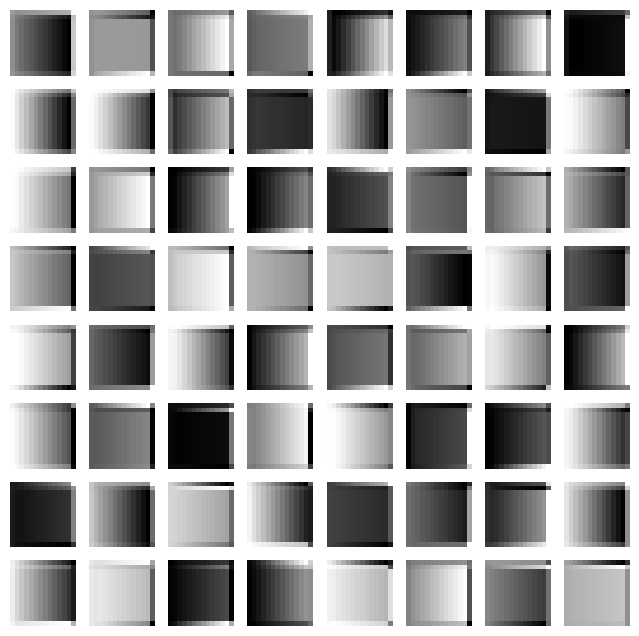

In [ ]:
visualize_feature_maps(model, sobel_tensor_3d, device)

### visualizing on a dataloader image

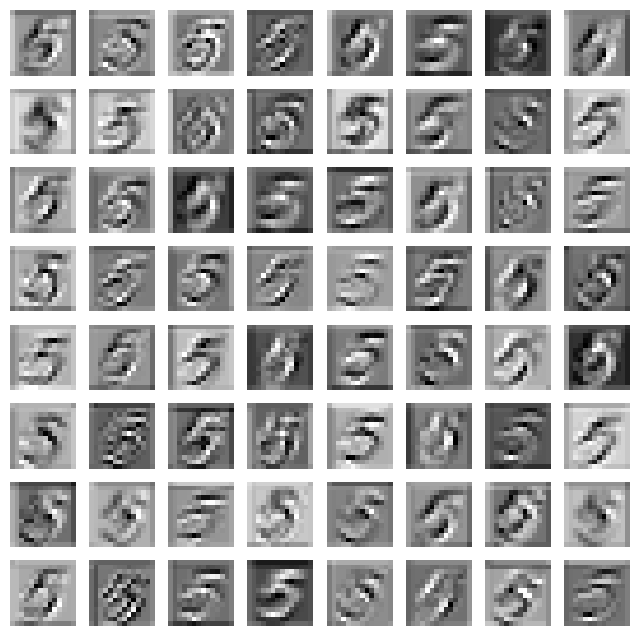

In [ ]:
visualize_feature_maps(model, image, device)

# Activation Maximization

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

# Load a pre-trained model (ResNet18 example)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()  # Set model to evaluation mode

# Select a target layer (e.g., first layer of ResNet block 1)
target_layer = model.layer1[0].conv2 #model.conv1

# Hook to capture activations from the target layer
activation = None
def hook_fn(module, input, output):
    global activation
    activation = output  # Save the activation

hook = target_layer.register_forward_hook(hook_fn)

# Generate a random input image initialized with noise
input_img = torch.randn(1, 3, 100, 100, device=device, requires_grad=True)

# Optimization settings
optimizer = torch.optim.Adam([input_img], lr=0.1)
lambda_reg = 10  # Regularization coefficient
num_iterations = 1000  # Number of optimization steps
gaussian_blur = True  # Whether to apply Gaussian blur regularization
L2_decay = True  # Whether to apply L2 decay

# Activation maximization loop
best_activation = -float('inf')
best_img = input_img

for i in range(num_iterations):
    optimizer.zero_grad()

    # Forward pass
    model(input_img)  # This triggers the hook and saves activations

    # Maximize the activation of the target layer
    loss = -activation.mean()  # Maximize activation of the entire layer

    # Regularization: L1 regularization
    loss += lambda_reg * torch.norm(input_img, p=1)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Apply Gaussian blur (if enabled)
    if gaussian_blur:
        img_np = input_img.squeeze(0).cpu().detach().numpy()
        img_np = gaussian_filter(img_np, sigma=1)
        input_img.data = torch.from_numpy(img_np).unsqueeze(0).to(device)

    # Apply L2 decay (if enabled)
    if L2_decay:
        input_img.data *= 0.9

    # Normalize image to stay within range [-1, 1]
    input_img.data = torch.clamp(input_img.data, -1, 1)

    # Save the best image based on the highest activation
    if activation.mean() > best_activation:
        best_activation = activation.mean()
        best_img = input_img.detach().clone()

    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss.item()}")

# Remove hook
hook.remove()

Iteration 0, Loss: 237153.359375
Iteration 100, Loss: 1355.9991455078125
Iteration 200, Loss: 1441.4600830078125
Iteration 300, Loss: 1441.674560546875
Iteration 400, Loss: 1443.28759765625
Iteration 500, Loss: 1443.2479248046875
Iteration 600, Loss: 1443.2276611328125
Iteration 700, Loss: 1443.2481689453125
Iteration 800, Loss: 1443.2484130859375
Iteration 900, Loss: 1443.2467041015625


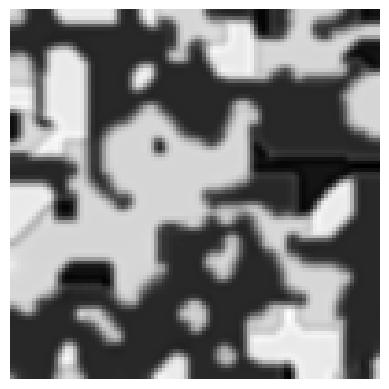

In [ ]:
def visualize_image(img):
    img = img.detach().cpu().squeeze().numpy()  # Remove channel dim if exists
    img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
    img = np.mean(img, axis=0)
    plt.imshow(img, cmap='gray')  # Use grayscale colormap
    plt.axis("off")
    plt.show()

visualize_image(best_img)

# Class Activation Map

The input image size is 28x28. The class activation map doesn't work here because the last output of the convolutional layer of ResNet18 is 1x1 without any spatial dimension. So it doesn't make any sense. Yet, I have written the code, so that you can use for other use cases.

torch.Size([512, 1, 1])
(512,)
torch.Size([1, 1])


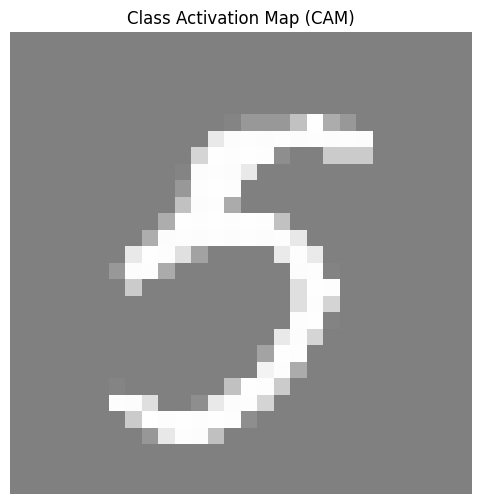

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms
import torch.nn as nn

# Load a modified ResNet18 model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

# Define function to compute CAM
def get_cam(model, image, class_idx=None):
    # Get the last convolutional layer before GAP
    feature_maps = None
    def hook_fn(module, input, output):
        nonlocal feature_maps
        feature_maps = output  # Save feature maps

    # Register hook on last convolutional layer
    layer = model.features[-1]  # Last conv layer before GAP
    hook = layer.register_forward_hook(hook_fn)

    # Forward pass
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    output = model(image)
    hook.remove()

    # Get predicted class if not provided
    if class_idx is None:
        class_idx = output.argmax(dim=1).item()

    # Get feature maps from the last conv layer (Before GAP)
    feature_maps = feature_maps.squeeze(0).cpu().detach()  # Shape: [512, H, W]

    # Get FC layer weights for the predicted class
    fc_weights = model.fc.weight[class_idx].detach().cpu().numpy()  # Shape: (512,)

    print(feature_maps.shape)
    print(fc_weights.shape)

    # Compute CAM as weighted sum of feature maps
    cam = torch.matmul(torch.tensor(fc_weights), feature_maps.view(512, -1)).view(feature_maps.shape[1:])

    print(cam.shape)

    # Normalize CAM
    cam = cam - cam.min()
    cam = cam / cam.max()
    cam = cv2.resize(cam.numpy(), (image.shape[2], image.shape[3]))

    return cam

# Load a sample image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
# Assume `image` is from the dataloader
dataiter = iter(valloader)
image, label = next(dataiter)
image = image[0]  # Take a single image

# Get CAM
cam = get_cam(model, image)

# Plot CAM overlay on image
plt.figure(figsize=(6, 6))
plt.imshow(image.permute(1, 2, 0).cpu().numpy(), alpha=0.5)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.axis('off')
plt.title("Class Activation Map (CAM)")
plt.show()